<a href="https://colab.research.google.com/github/RudrakshSugandhi/VNPD-Vehicle-Number-plate-Detection-/blob/end-to-end_update/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers
!pip install torch
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14311, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 14311 (delta 31), reused 32 (delta 13), pack-reused 14242
Receiving objects: 100% (14311/14311), 13.66 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (9831/9831), done.


In [5]:
model = torch.hub.load('ultralytics/yolov5','custom', path = '/content/best_model_weights.pt')

/usr/local/lib/python3.8/dist-packages/torch/hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /root/.cache/torch/hu

In [8]:
img = "/content/Cars143_png.rf.2a0c94284d08d427e8c3513612ccc0d6.jpg"

In [9]:
result = model(img)

In [10]:
result.print()

image 1/1: 640x640 2 licences
Speed: 63.8ms pre-process, 536.0ms inference, 18.1ms NMS per image at shape (1, 3, 640, 640)


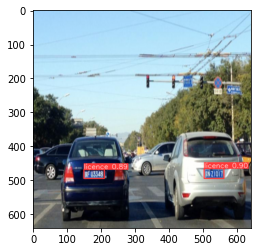

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [17]:
!python3 /content/yolov5/detect.py --source /content/Cars143_png.rf.2a0c94284d08d427e8c3513612ccc0d6.jpg --weights best_model_weights.pt --save-crop

detect: weights=['best_model_weights.pt'], source=/content/Cars143_png.rf.2a0c94284d08d427e8c3513612ccc0d6.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
image 1/1 /content/Cars143_png.rf.2a0c94284d08d427e8c3513612ccc0d6.jpg: 640x640 2 licences, 476.1ms
Speed: 2.0ms pre-process, 476.1ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp3


In [13]:
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
model2 = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')


Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img

In [18]:
   def ocr_printed_image(src_img):
  pixel_values = model2(images=src_img, return_tensors="pt").pixel_values
  generated_ids = printed_model.generate(pixel_values)
  return model2.batch_decode(generated_ids, skip_special_tokens=True)[0]

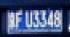

In [19]:
invoice_image = show_image('/content/yolov5/runs/detect/exp3/crops/licence/Cars143_png.rf.2a0c94284d08d427e8c3513612ccc0d6.jpg')

In [ ]:
invoice_image1 = invoice_image.crop((0, 0, invoice_image.size[0], 225))
display(invoice_image1)
     

In [23]:
ocr_printed_image(invoice_image)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'RF U3348'